In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import chain, combinations
from scipy.stats import wilcoxon

In [2]:
baseline_models = pd.read_csv("baseline_models.csv")

In [3]:
first_val = baseline_models["Bitcoin"].reset_index(drop=True).values[0]
last_val = baseline_models["Bitcoin"].reset_index(drop=True).values[-1]

In [4]:
all_trades = pd.read_csv("final_scores_trading.csv")

In [5]:
df = all_trades[[col for col in all_trades.columns if ('dollar' in col and  'strategy1' in col)]][1:]

In [6]:
for col in df.columns: #extract value baseline model from every value to plot diff with baseline
    df[col] = df[col] - baseline_models["Random"]

### Plot strategy 1 

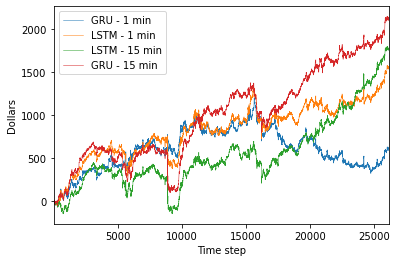

In [7]:
colors = ["black","dimgray","darkgray","lightgray"]
df.columns = ['GRU - 1 min',
              'LSTM - 1 min',
              'LSTM - 15 min',
              'GRU - 15 min']
ax = df.plot(lw=0.5)
ax.set_xlabel("Time step")
ax.set_ylabel("Dollars")
ax.grid(False)

fig = ax.get_figure()
fig.savefig("strategy_1_improvement_baseline.png")


### Plot strategy 2 

In [8]:
df = all_trades[[col for col in all_trades.columns if ('dollar' in col and  'strategy2' in col)]][1:]

In [9]:
for col in df.columns:
    df[col] = df[col] - baseline_models["Random"]

In [10]:
df.columns

Index(['GRU_1_strategy2_dollars', 'LSTM_1_strategy2_dollars',
       'LSTM_15_strategy2_dollars', 'GRU_15_strategy2_dollars'],
      dtype='object')

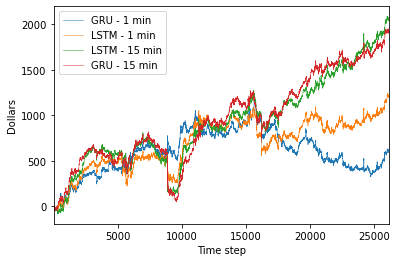

In [11]:
colors = ["black","dimgray","darkgray","lightgray"]
df.columns = ['GRU - 1 min',
              'LSTM - 1 min',
              'LSTM - 15 min',
              'GRU - 15 min']
ax = df.plot(lw=0.5)
ax.set_xlabel("Time step")
ax.set_ylabel("Dollars")
ax.grid(False)

fig = ax.get_figure()
fig.savefig("strategy_2_improvement_baseline.png")


### Plot baseline models 

In [12]:
df = baseline_models[['Bitcoin', 'Ethereum', 'Optimistic', 'Random']][1:]

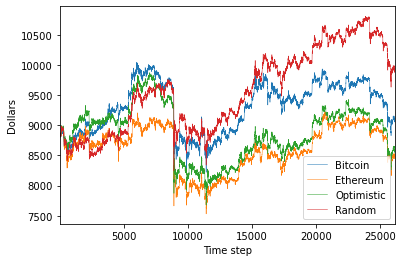

In [13]:
colors = ["black","dimgray","darkgray","lightgray"]
ax = df.plot(lw=0.5)
ax.set_xlabel("Time step")
ax.set_ylabel("Dollars")
ax.grid(False)

fig = ax.get_figure()
fig.savefig("Baseline_models.png")